### SARS-CoV-2 genome

<img src="corona.jpg" width="400">

The genetic code of each living organism is a long sequence of simple molecules called nucleotides or bases. Although many nucleotides exist in nature, only 4 nucleotides, labeled A, C, G, and T, have been found in DNA. They are abbreviations of Adenine, Cytosine, Guanine, and Thymine

### Sample from Nepal

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [23]:
file = 'data_external/covid.fasta'
with open(file, 'rb') as f:
    data = f.readlines()
    f.close()

In [10]:
# file = open('data_external/covid.fasta')
# data = file.readlines()
# file.close()
len(data)
# data

427

### Formatting the data

In [8]:
rna = ''.join([line.strip() for line in data[1:]]) 
#takes iterable and joins with joiner ''
# strip removes all '\n'
len(rna)

29811

### DNA: ATCG, RNA: AUCG
### CONVERT RNA SEQUENCE TO COMPLIMENTARY DNA

When describing RNA, the T (Thymine) is often replaced by U (Uracil). This is done for example in an interesting [New York Times article](https://www.nytimes.com/interactive/2020/04/03/science/coronavirus-genome-bad-news-wrapped-in-protein.html). The article explains how this RNA code makes infected host cells produce a variety of proteins. Scientists have a good understanding of what some of these proteins do, but not all.

Here is a quote from the article on a protein it nicknamed Virus Liberator. ORF7a

When new viruses try to escape a cell, the cell can snare them with
proteins called tetherin. Some research suggests that ORF7a cuts 
down an infected cell’s supply of tetherin, allowing more of the 
viruses to escape. Researchers have also found that the protein can
trigger infected cells to commit suicide - which contributes to the
damage Covid-19 causes to the lungs.

The article then gives the ORF7a sequence, which I have copied and pasted into the next cell, adding some string breaks. Note how the article has used lower case characters and the character u instead of T

In [11]:
orf7a = \
'augaaaauuauucuuuucuuggcacugauaacacucgcuacuugugagcuuuaucacuaccaag' + \
'aguguguuagagguacaacaguacuuuuaaaagaaccuugcucuucuggaacauacgagggcaa' + \
'uucaccauuucauccucuagcugauaacaaauuugcacugacuugcuuuagcacucaauuugcu' + \
'uuugcuuguccugacggcguaaaacacgucuaucaguuacgugccagaucaguuucaccuaaac' + \
'uguucaucagacaagaggaaguucaagaacuuuacucuccaauuuuucuuauuguugcggcaau' + \
'aguguuuauaacacuuugcuucacacucaaaagaaagacagaaugauugaacuuucauuaauug' + \
'acuucuauuugugcuuuuuagccuuucugcuauuccuuguuuuaauuaugcuuauuaucuuuug' + \
'guucucacuugaacugcaagaucauaaugaaacuugucacgccuaaacgaac'

The next task is to find if this sequence occurs in the RNA we just imported, and if it does, where it occurs. To this end, we first make the replacements required to read the string in terms of A, T, G, and C.

In [12]:
s=orf7a.replace('u', 'T').replace('a', 'A').replace('g', 'G').replace('c', 'C')
s

'ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAAC'

In [13]:
s in rna   #check ORF7A sequence in RNA

True

We may also easily find the location of the ORF7a sequence and read off the entire string beginning with the sequence.

In [15]:
rna.find(s)

27378

In [16]:
rna[27378:]

'ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACG

### Nucleotide frequencies

The frequency of a base or a nucleotide in a genetic code is the number of times it occurs divided by the length of the code. The varying frequency of different nucleotides, called the nucleotide bias varies between organisms and is known to have biological implications.

In [19]:
freq = {b: rna.count(b)/len(rna)   for b in 'ATGC'}

In [20]:
freq

{'A': 0.2986481500117406,
 'T': 0.32115662003958273,
 'G': 0.19630337794773742,
 'C': 0.18389185200093924}

/home/graviton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


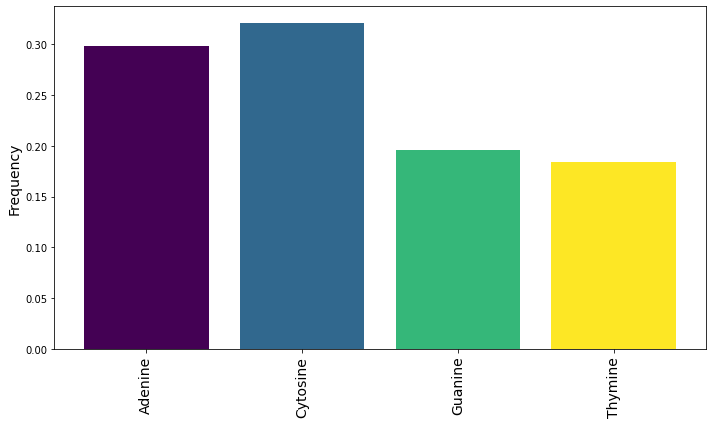

In [21]:
viridis = cm.get_cmap('viridis', 4)
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(freq.keys(),freq.values(), color = viridis.colors)

#ax.bar(wuhan_freq.keys(),wuhan_freq.values(), color = ['Black', 'Blue', 'Green', 'Yellow'])
ax.set_xticklabels(['Adenine', 'Cytosine', 'Guanine','Thymine'], rotation=90, fontsize = 14)
ax.set_ylabel("Frequency", fontsize = 14)
    
plt.tight_layout()


### Wuhan Sample

In [22]:
with open('data_external/wuhan.fasta', 'r') as f:
    data1 = f.readlines()

In [34]:
data1
len(data1)

429

In [32]:
wuhan = ''.join([line.strip() for line in data1[1:]])

In [35]:
wuhan
len(wuhan)

29903

In [1]:
# len(wuhan)

In [2]:
# s in wuhan

In [37]:
wuhan[wuhan.find(s):]

'ATGAAAATTATTCTTTTCTTGGCACTGATAACACTCGCTACTTGTGAGCTTTATCACTACCAAGAGTGTGTTAGAGGTACAACAGTACTTTTAAAAGAACCTTGCTCTTCTGGAACATACGAGGGCAATTCACCATTTCATCCTCTAGCTGATAACAAATTTGCACTGACTTGCTTTAGCACTCAATTTGCTTTTGCTTGTCCTGACGGCGTAAAACACGTCTATCAGTTACGTGCCAGATCAGTTTCACCTAAACTGTTCATCAGACAAGAGGAAGTTCAAGAACTTTACTCTCCAATTTTTCTTATTGTTGCGGCAATAGTGTTTATAACACTTTGCTTCACACTCAAAAGAAAGACAGAATGATTGAACTTTCATTAATTGACTTCTATTTGTGCTTTTTAGCCTTTCTGCTATTCCTTGTTTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGAAACTTGTCACGCCTAAACGAACATGAAATTTCTTGTTTTCTTAGGAATCATCACAACTGTAGCTGCATTTCACCAAGAATGTAGTTTACAGTCATGTACTCAACATCAACCATATGTAGTTGATGACCCGTGTCCTATTCACTTCTATTCTAAATGGTATATTAGAGTAGGAGCTAGAAAATCAGCACCTTTAATTGAATTGTGCGTGGATGAGGCTGGTTCTAAATCACCCATTCAGTACATCGATATCGGTAATTATACAGTTTCCTGTTTACCTTTTACAATTAATTGCCAGGAACCTAAATTGGGTAGTCTTGTAGTGCGTTGTTCGTTCTATGAAGACTTTTTAGAGTATCATGACGTTCGTGTTGTTTTAGATTTCATCTAAACGAACAAACTAAAATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACG

In [41]:
wuhan_freq = {b: wuhan.count(b)/len(wuhan) for b in 'ATGC'}

In [42]:
wuhan_freq

{'A': 0.29943483931378123,
 'T': 0.32083737417650404,
 'G': 0.19606728421897468,
 'C': 0.18366050229074005}

Thus, we located the same ORF7a instruction in this virus at a different location. Although the genetic code from the Nepal sample and the Wuhan sample are different, they can make the same protein ORF7a and their nucleotide frequencies are very close.

This activity provided you with just a glimpse into the large field of bioinformatics, which studies, among other things, patterns of nucleotide arrangements. If you are interested in this field, you should take a look at Biopython, a bioinformatics python package.


/home/graviton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


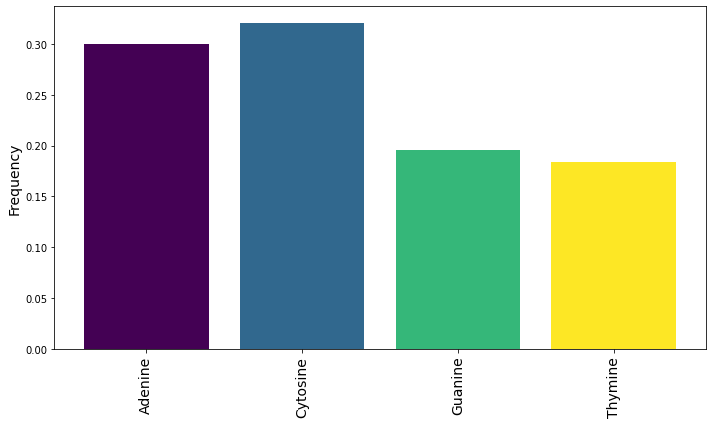

In [43]:
viridis = cm.get_cmap('viridis', 4)
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(wuhan_freq.keys(),wuhan_freq.values(), color = viridis.colors)

#ax.bar(wuhan_freq.keys(),wuhan_freq.values(), color = ['Black', 'Blue', 'Green', 'Yellow'])
ax.set_xticklabels(['Adenine', 'Cytosine', 'Guanine','Thymine'], rotation=90, fontsize = 14)
ax.set_ylabel("Frequency", fontsize = 14)
    
plt.tight_layout()
